In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
!pip install --upgrade scikit-learn
warnings.filterwarnings("ignore")
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc,classification_report

     ---------------------------------------- 9.2/9.2 MB 3.3 MB/s eta 0:00:00
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [69]:
df = pd.read_csv('finaldata1.csv')
bots = df[df.bot==1]
nonbots = df[df.bot==0]

In [70]:
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,tweet,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",...,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",there are some truly sick ppl out there.,1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,02-01-2016 07:37,...,False,31,en,NaN,True,False,False,Keri Nelson,bihday pressie from my mummy and my granny #mi...,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,...,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,Matt Lieber is a little bit of hot supper afte...,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,...,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,Construction of human anti-tetanus single-chai...,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,01-01-2015 17:44,...,False,185,en,NaN,False,False,False,lucarivera16,@user stuck in athens instead of santorini be...,1


In [71]:
df = pd.read_csv('finaldata1.csv')
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
df['screen_name_binary'] = df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
df['name_binary'] = df.name.str.contains(bag_of_words_bot, case=False, na=False)
df['description_binary'] = df.description.str.contains(bag_of_words_bot, case=False, na=False)
df['status_binary'] = df.status.str.contains(bag_of_words_bot, case=False, na=False)
#df['tweet_binary'] = df.tweet.str.contains(bag_of_words_bot, case=False, na=False)

In [72]:
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count','tweet', 'bot']

In [73]:
features

['screen_name_binary',
 'name_binary',
 'description_binary',
 'status_binary',
 'verified',
 'followers_count',
 'friends_count',
 'statuses_count',
 'tweet',
 'bot']

In [74]:
X = df[features].iloc[:,5:-1]

In [75]:
X

,followers_count,friends_count,statuses_count,tweet
0,1291,0,78554,there are some truly sick ppl out there.
1,1,349,31,bihday pressie from my mummy and my granny #mi...
2,1086,0,713,Matt Lieber is a little bit of hot supper afte...
3,33,0,676,Construction of human anti-tetanus single-chai...
4,11,745,185,@user stuck in athens instead of santorini be...
...,...,...,...,...
2193,51314111,392225,5126,RT @lukester: Springing forward should happen ...
2194,46,54,194,Data Science is a team sport. I'm _ for all o...
2195,45,146,36,Sitting at home and im very bored keep hearing...
2196,1336587,512,17125,RT @CNN: School apologizes after fifth-graders...


In [76]:
y = df[features].iloc[:,-1]

In [77]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2193    0
2194    0
2195    0
2196    0
2197    0
Name: bot, Length: 2198, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Preprocessing on Tweets

In [79]:
#!pip install nltk
import re
import nltk
"""
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')"""

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [80]:

stemmer = PorterStemmer()
lemmatizer=WordNetLemmatizer() 
import re
corpus = []
for i in range(0, len(df)):
    if isinstance(df['tweet'][i], str):
        review = re.sub('[^a-zA-Z@#0-9 ]' ,' ', df['tweet'][i])
        review = review.lower()
        review = review.split()
        review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
print(corpus)

['truly sick ppl', 'bihday pressie mummy granny #michaelkors #luckygirl #bihday #liverpool', 'matt lieber little bit hot supper afterwards', 'construction human anti tetanus single chain variable fragment applying symplex technology http co 5wjzdutkou', '@user stuck athens instead santorini @user said windy land shocking service every level since', 'anyone ever tried throwing water kellyanne conway', 'u mostly admire', 'couple fat naked japanese girl', 'feeding schedule proteolysis regulate autophagic clearance mutant huntingtin http co zlqdliy2vb', 'functional selectivity cytokine signaling revealed pathogenic epo mutation http co u4vr9z9ec9 http co rkdtigzdkz', 'daughter riding bike around driveway son playing guitar u enjoy campfire #summeime #memories', 'large scale chromosome folding versus genomic dna sequence', '@user happy folk first #freakshake launch #freaks #yum #dalston @user', 'huge crowd trump', 'thankful saturday #thankful #positive', 'hard bag four item', 'omg loving st

# CountVectorizer

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Feature Selection

In [82]:
y = df[features].iloc[:,-1]

In [83]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2193    0
2194    0
2195    0
2196    0
2197    0
Name: bot, Length: 2198, dtype: int64

In [84]:
import pickle
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

# Split Data into Test and Train

In [85]:
X = df[features].iloc[:,5:-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 42)


# Multinomial Navie Bayes

In [86]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Naive Bayes model
mnb = MultinomialNB(alpha=0.8)
mnb.fit(X_train, y_train)

y_pred_mnb=mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test,y_pred_mnb)
print("Training accuracy Score    : ",mnb.score(X_train,y_train))
print("Validation accuracy Score : ",mnb_accuracy )
print(classification_report(y_pred_mnb,y_test))




Training accuracy Score    :  0.8015776699029126
Validation accuracy Score :  0.7963636363636364
              precision    recall  f1-score   support

           0       0.47      0.88      0.61       100
           1       0.97      0.78      0.86       450

    accuracy                           0.80       550
   macro avg       0.72      0.83      0.74       550
weighted avg       0.88      0.80      0.82       550



In [87]:
"""# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = mnb.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)"""


'# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = mnb.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)'

# Bernoulli Navie Bayes

In [88]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

bnb = BernoulliNB(alpha=0.5)
bnb.fit(X_train,y_train)
y_pred_bnb=mnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test,y_pred_bnb)
print("Training accuracy Score    : ",bnb.score(X_train,y_train))
print("Validation accuracy Score : ",bnb_accuracy )
print(classification_report(y_pred_bnb,y_test))

Training accuracy Score    :  0.9205097087378641
Validation accuracy Score :  0.7963636363636364
              precision    recall  f1-score   support

           0       0.47      0.88      0.61       100
           1       0.97      0.78      0.86       450

    accuracy                           0.80       550
   macro avg       0.72      0.83      0.74       550
weighted avg       0.88      0.80      0.82       550



In [89]:
"""# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = bnb.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = bnb.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

# RandomForestClassifier

In [90]:
#multinomial Navie Bayes model
filename = 'bot-model.pkl'
pickle.dump(mnb, open(filename, 'wb'))

In [91]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.8527272727272728
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       145
           1       0.95      0.85      0.89       405

    accuracy                           0.85       550
   macro avg       0.81      0.86      0.83       550
weighted avg       0.87      0.85      0.86       550



In [92]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = rf_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = rf_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

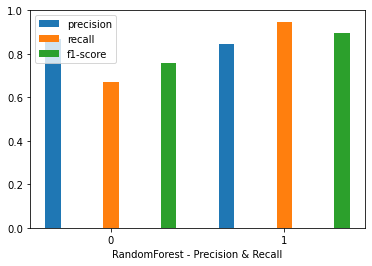

In [93]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create the classification report
report = classification_report(y_test, rf_prediction, output_dict=True)

# Extract the precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]
scores = np.zeros((len(classes), len(metrics)))
for i, c in enumerate(classes):
    for j, m in enumerate(metrics):
        scores[i, j] = report[c][m]

# Create the bar chart
x = np.arange(len(classes)) * 3
fig, ax = plt.subplots()
for j, m in enumerate(metrics):
    ax.bar(x - 1 + j, scores[:, j], width=0.8/len(metrics), label=m)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel("RandomForest - Precision & Recall")
ax.set_ylim([0, 1])
ax.legend()
plt.show()


In [94]:
import joblib
joblib.dump(rf_clf, 'RFC-20%.pkl')
RFCjoblib = joblib.load('RFC-20%.pkl')
RFCjoblib.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,

# LogisticRegression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

LR_clf = LogisticRegression()
LR_clf.fit(X_train,y_train)

LR_pred = LR_clf.predict(X_test)
LR_accuracy = accuracy_score(y_test,LR_pred)
print("Training accuracy Score    : ",LR_clf.score(X_train,y_train))
print("Validation accuracy Score : ",LR_accuracy )
print(classification_report(LR_pred,y_test))

Training accuracy Score    :  0.7942961165048543
Validation accuracy Score :  0.7872727272727272
              precision    recall  f1-score   support

           0       0.43      0.89      0.58        91
           1       0.97      0.77      0.86       459

    accuracy                           0.79       550
   macro avg       0.70      0.83      0.72       550
weighted avg       0.88      0.79      0.81       550



In [97]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = LR_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = LR_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

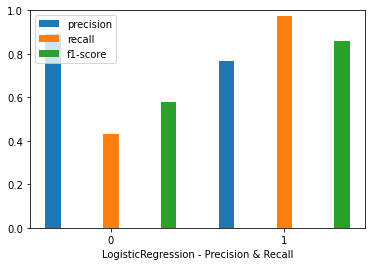

In [98]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create the classification report
report = classification_report(y_test, LR_pred, output_dict=True)

# Extract the precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]
scores = np.zeros((len(classes), len(metrics)))
for i, c in enumerate(classes):
    for j, m in enumerate(metrics):
        scores[i, j] = report[c][m]

# Create the bar chart
x = np.arange(len(classes)) * 3
fig, ax = plt.subplots()
for j, m in enumerate(metrics):
    ax.bar(x - 1 + j, scores[:, j], width=0.8/len(metrics), label=m)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel("LogisticRegression - Precision & Recall")
ax.set_ylim([0, 1])
ax.legend()
plt.show()


In [99]:
import joblib
joblib.dump(rf_clf, 'LR-30%.pkl')
LRjoblib = joblib.load('LR-30%.pkl')
LRjoblib.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,

# DecisionTreeClassifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
DT_pred = DT_clf.predict(X_test)
DT_accuracy = accuracy_score(y_test,DT_pred)
print("Training accuracy Score    : ",DT_clf.score(X_train,y_train))
print("Validation accuracy Score : ",DT_accuracy )
print(classification_report(DT_pred,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.8327272727272728
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       186
           1       0.88      0.87      0.87       364

    accuracy                           0.83       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.83      0.83      0.83       550



In [102]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = DT_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = DT_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

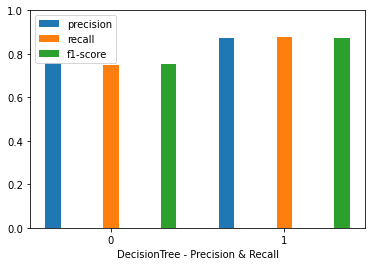

In [103]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create the classification report
report = classification_report(y_test, DT_pred, output_dict=True)

# Extract the precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]
scores = np.zeros((len(classes), len(metrics)))
for i, c in enumerate(classes):
    for j, m in enumerate(metrics):
        scores[i, j] = report[c][m]

# Create the bar chart
x = np.arange(len(classes)) * 3
fig, ax = plt.subplots()
for j, m in enumerate(metrics):
    ax.bar(x - 1 + j, scores[:, j], width=0.8/len(metrics), label=m)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel("DecisionTree - Precision & Recall")
ax.set_ylim([0, 1])
ax.legend()
plt.show()

In [104]:
import joblib
joblib.dump(DT_clf, 'DT-30%.pkl')
dtjoblib = joblib.load('DT-30%.pkl')
dtjoblib.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

# Support Vector Machine (SVM) 

In [105]:
X_train

array([[   14,     0,   129, ...,     0,     0,     0],
       [  115,    93,   126, ...,     0,     0,     0],
       [  280,    48,  4722, ...,     0,     0,     0],
       ...,
       [  236,     0,  2821, ...,     0,     0,     0],
       [  260,     0, 25155, ...,     0,     0,     0],
       [ 2339,     1,  3625, ...,     0,     0,     0]], dtype=int64)

In [106]:
y_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
print("Training accuracy Score    : ",svm_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svm_accuracy )
print(classification_report(svm_pred,y_test))

Training accuracy Score    :  0.7402912621359223
Validation accuracy Score :  0.7490909090909091
              precision    recall  f1-score   support

           0       0.28      0.95      0.43        56
           1       0.99      0.73      0.84       494

    accuracy                           0.75       550
   macro avg       0.64      0.84      0.64       550
weighted avg       0.92      0.75      0.80       550



In [108]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = svm_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = svm_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

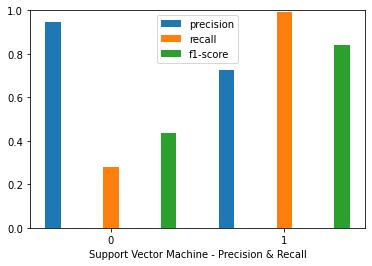

In [109]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create the classification report
report = classification_report(y_test, svm_pred, output_dict=True)

# Extract the precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]
scores = np.zeros((len(classes), len(metrics)))
for i, c in enumerate(classes):
    for j, m in enumerate(metrics):
        scores[i, j] = report[c][m]

# Create the bar chart
x = np.arange(len(classes)) * 3
fig, ax = plt.subplots()
for j, m in enumerate(metrics):
    ax.bar(x - 1 + j, scores[:, j], width=0.8/len(metrics), label=m)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel("Support Vector Machine - Precision & Recall")
ax.set_ylim([0, 1])
ax.legend()
plt.show()


In [110]:
import joblib
joblib.dump(svm_clf, 'SVC-20%.pkl')
svcjoblib = joblib.load('SVC-20%.pkl')
svcjoblib.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

# AdaBoostClassifier

In [111]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ada_clf = AdaBoostClassifier(n_estimators=100,random_state=0)
ada_clf.fit(X_train,y_train)
ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test,ada_pred)
print("Training accuracy Score    : ",ada_clf.score(X_train,y_train))
print("Validation accuracy Score : ",ada_accuracy )
print(classification_report(ada_pred,y_test))

Training accuracy Score    :  0.9277912621359223
Validation accuracy Score :  0.8490909090909091
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       179
           1       0.90      0.88      0.89       371

    accuracy                           0.85       550
   macro avg       0.83      0.83      0.83       550
weighted avg       0.85      0.85      0.85       550



In [112]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = ada_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = ada_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

# KNeighborsClassifier 

In [113]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_pred)
print("Training accuracy Score    : ",knn_clf.score(X_train,y_train))
print("Validation accuracy Score : ",knn_accuracy )
print(classification_report(knn_pred,y_test))

Training accuracy Score    :  0.8847087378640777
Validation accuracy Score :  0.8327272727272728
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       186
           1       0.88      0.87      0.87       364

    accuracy                           0.83       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.83      0.83      0.83       550



In [114]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = knn_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = knn_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

# OneVsRestClassifier

In [115]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

onevsrestsvm_clf = OneVsRestClassifier(SVC()).fit(X_train,y_train)
onevsrestsvm_pred = onevsrestsvm_clf.predict(X_test)
onevsrestsvm_accuracy = accuracy_score(y_test,onevsrestsvm_pred)
print("Training accuracy Score    : ",onevsrestsvm_clf.score(X_train,y_train))
print("Validation accuracy Score : ",onevsrestsvm_accuracy )
print(classification_report(onevsrestsvm_pred,y_test))

Training accuracy Score    :  0.7402912621359223
Validation accuracy Score :  0.7490909090909091
              precision    recall  f1-score   support

           0       0.28      0.95      0.43        56
           1       0.99      0.73      0.84       494

    accuracy                           0.75       550
   macro avg       0.64      0.84      0.64       550
weighted avg       0.92      0.75      0.80       550



In [116]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = onevsrestsvm_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = onevsrestsvm_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

In [117]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

onevsrestxgb_clf = OneVsRestClassifier(xgb.XGBClassifier()).fit(X_train,y_train)
onevsrestxgb_pred = onevsrestxgb_clf.predict(X_test)
onevsrestxgb_accuracy = accuracy_score(y_test,onevsrestxgb_pred)
print("Training accuracy Score    : ",onevsrestxgb_clf.score(X_train,y_train))
print("Validation accuracy Score : ",onevsrestxgb_accuracy )
print(classification_report(onevsrestxgb_pred,y_test))

Training accuracy Score    :  0.9993932038834952
Validation accuracy Score :  0.889090909090909
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       189
           1       0.91      0.92      0.92       361

    accuracy                           0.89       550
   macro avg       0.88      0.88      0.88       550
weighted avg       0.89      0.89      0.89       550



In [118]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = onevsrestxgb_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = onevsrestxgb_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

In [119]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

onevsrestknn_clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3)).fit(X_train,y_train)
onevsrestknn_pred = onevsrestknn_clf.predict(X_test)
onevsrestknn_accuracy = accuracy_score(y_test,onevsrestknn_pred)
print("Training accuracy Score    : ",onevsrestknn_clf.score(X_train,y_train))
print("Validation accuracy Score : ",onevsrestknn_accuracy )
print(classification_report(onevsrestknn_pred,y_test))

Training accuracy Score    :  0.9010922330097088
Validation accuracy Score :  0.8272727272727273
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       189
           1       0.87      0.87      0.87       361

    accuracy                           0.83       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.83      0.83      0.83       550



In [120]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = onevsrestknn_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = onevsrestknn_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

In [121]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

onevsrestrfc_clf = OneVsRestClassifier(RandomForestClassifier()).fit(X_train,y_train)
onevsrestrfc_pred = onevsrestrfc_clf.predict(X_test)
onevsrestrfc_accuracy = accuracy_score(y_test,onevsrestrfc_pred)
print("Training accuracy Score    : ",onevsrestrfc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",onevsrestrfc_accuracy )
print(classification_report(onevsrestrfc_pred,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.84
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       142
           1       0.94      0.84      0.89       408

    accuracy                           0.84       550
   macro avg       0.79      0.84      0.81       550
weighted avg       0.86      0.84      0.85       550



In [122]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = onevsrestrfc_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = onevsrestrfc_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

In [123]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your data is in a DataFrame called df
X = np.concatenate((df[['followers_count', 'friends_count', 'statuses_count']].values, cv.fit_transform(df['tweet']).toarray()), axis=1)
y = df['bot'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

onevsrestdt_clf = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train,y_train)
onevsrestdt_pred = onevsrestdt_clf.predict(X_test)
onevsrestdt_accuracy = accuracy_score(y_test,onevsrestdt_pred)
print("Training accuracy Score    : ",onevsrestdt_clf.score(X_train,y_train))
print("Validation accuracy Score : ",onevsrestdt_accuracy )
print(classification_report(onevsrestdt_pred,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.84
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       188
           1       0.88      0.88      0.88       362

    accuracy                           0.84       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.84      0.84      0.84       550



In [124]:
"""
# Get user input
followers_count = int(input("Enter number of followers: "))
friends_count = int(input("Enter number of friends: "))
statuses_count = int(input("Enter number of statuses: "))
tweet = input("Enter the tweet text: ")

# Preprocess user input
user_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)

# Make prediction on user input
prediction = onevsrestdt_clf.predict(user_input)

if(prediction==1):
    print("Bot")
else:
    print("Human")
#print("Prediction: ", prediction)
"""

'\n# Get user input\nfollowers_count = int(input("Enter number of followers: "))\nfriends_count = int(input("Enter number of friends: "))\nstatuses_count = int(input("Enter number of statuses: "))\ntweet = input("Enter the tweet text: ")\n\n# Preprocess user input\nuser_input = np.concatenate((np.array([followers_count, friends_count, statuses_count]).reshape(1, -1), cv.transform([tweet]).toarray()), axis=1)\n\n# Make prediction on user input\nprediction = onevsrestdt_clf.predict(user_input)\n\nif(prediction==1):\n    print("Bot")\nelse:\n    print("Human")\n#print("Prediction: ", prediction)\n'

# XGBoost - XGBClassifier

In [125]:
!pip install xgboost

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasetxg = pd.read_csv("finaldata1.csv")



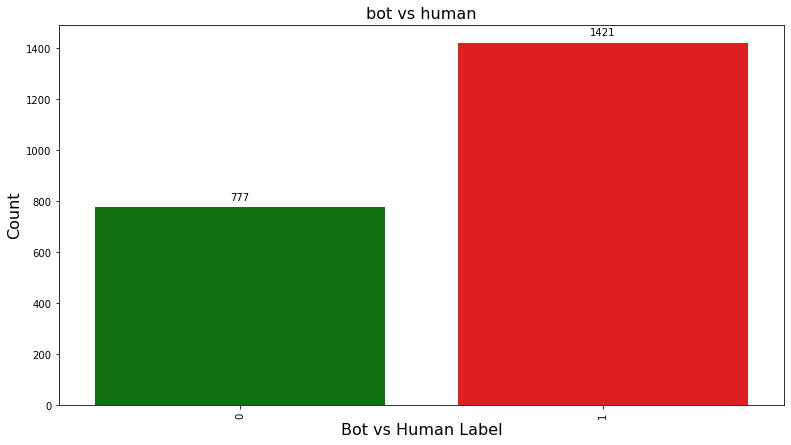

In [126]:
plt.figure(figsize=(13,7))
ax = sns.countplot(x=datasetxg.bot, palette={0: 'green', 1: 'red'})
plt.title('bot vs human', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Bot vs Human Label', fontsize=16)
plt.xticks(rotation='vertical')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


In [127]:
#!pip install gensim

#!pip install --upgrade numpy

X = df[['followers_count','friends_count','statuses_count','tweet']]
Y = df['bot']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [128]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))#an,is,..
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [129]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

from xgboost import XGBClassifier

from nltk.tokenize import word_tokenize
import re
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z ]", " ", str_input).lower().split()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if not word in stopwords.words('english')]
    return words


#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stop_words

#Both pipelines are then combined into a FeatureUnion, which concatenates the output of the two pipelines into a single feature matrix.
# TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.
    
classifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('colext', TextSelector('tweet')),
            ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop_words,
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
            ('svd', TruncatedSVD(algorithm='randomized', n_components=300)),
        ])),
        ('followers', Pipeline([
            ('fext', NumberSelector('followers_count')),
            ('fscaler', StandardScaler()),
        ])),
        ('friends', Pipeline([
            ('frndext', NumberSelector('friends_count')),
            ('frndscaler', StandardScaler()),
        ])),
        ('statuses', Pipeline([
            ('stext', NumberSelector('statuses_count')),
            ('stscaler', StandardScaler()),
        ]))
    ])),
    ('clf', XGBClassifier(max_depth=3, n_estimators=350, learning_rate=0.1)),
])

In [130]:

#print(y_train)
print(X_train)

      followers_count  friends_count  statuses_count  \
1955               31             39            1856   
610                29             97               3   
543              6805             88            3272   
1126                7              1             246   
1375              152              0            3301   
...               ...            ...             ...   
919                 5            474              81   
2000            89537           7950           55289   
389               275              1            1961   
832                33             38              17   
649              4956              7            2179   

                                                  tweet  
1955  Someone PLEASE take Gossip Girl away from me. ...  
610   i just caught myself eating chocolate sliced b...  
543   You can buy Twitter Followers on FollowerSale ...  
1126    I'm not lamplit but I am illuminated by a lamp.  
1375  EAT With so much fresh food ava

In [131]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
print ("Accuracy:", classifier.score(X_train,y_train))
xgbboost_accuracy = accuracy_score(y_test,preds)
print("Validation accuracy Score : ",xgbboost_accuracy )
print(classification_report(y_test, preds))
print (confusion_matrix(y_test, preds))

Accuracy: 0.9987864077669902
Validation accuracy Score :  0.8927272727272727
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       189
           1       0.91      0.93      0.92       361

    accuracy                           0.89       550
   macro avg       0.88      0.88      0.88       550
weighted avg       0.89      0.89      0.89       550

[[157  32]
 [ 27 334]]


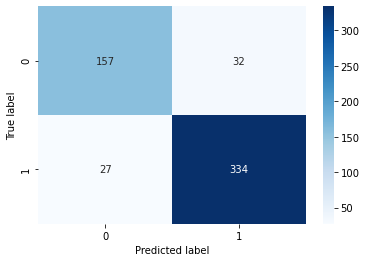

In [132]:
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, preds)

# Create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set axis labels
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Show plot
plt.show()


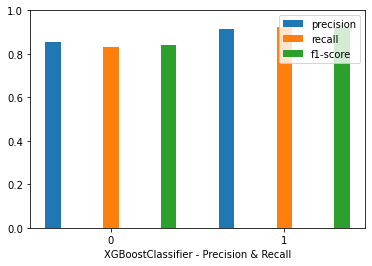

In [133]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create the classification report
report = classification_report(y_test, preds, output_dict=True)

# Extract the precision, recall, and F1-score for each class
classes = list(report.keys())[:-3]
metrics = ["precision", "recall", "f1-score"]
scores = np.zeros((len(classes), len(metrics)))
for i, c in enumerate(classes):
    for j, m in enumerate(metrics):
        scores[i, j] = report[c][m]

# Create the bar chart
x = np.arange(len(classes)) * 3
fig, ax = plt.subplots()
for j, m in enumerate(metrics):
    ax.bar(x - 1 + j, scores[:, j], width=0.8/len(metrics), label=m)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel("XGBoostClassifier - Precision & Recall")
ax.set_ylim([0, 1])
ax.legend()
plt.show()


# XGboost

In [134]:
"""
input_tweet = "welcome tweet" # replace "example tweet" with the tweet you want to classify
input_followers = 100 # replace 100 with the number of followers for the Twitter user associated with the input tweet
friends=200
status=30
# create a dataframe with the input data
input_df = pd.DataFrame({'tweet': [input_tweet], 'followers_count': [input_followers], 'friends_count':[friends], 'statuses_count':[status]})

# use the classifier to make predictions on the input data
predictions = classifier.predict(input_df)

# print the predictions

if(predictions==1):
    print("bot")
else:
    print("human")
#print(predictions)
"""

'\ninput_tweet = "welcome tweet" # replace "example tweet" with the tweet you want to classify\ninput_followers = 100 # replace 100 with the number of followers for the Twitter user associated with the input tweet\nfriends=200\nstatus=30\n# create a dataframe with the input data\ninput_df = pd.DataFrame({\'tweet\': [input_tweet], \'followers_count\': [input_followers], \'friends_count\':[friends], \'statuses_count\':[status]})\n\n# use the classifier to make predictions on the input data\npredictions = classifier.predict(input_df)\n\n# print the predictions\n\nif(predictions==1):\n    print("bot")\nelse:\n    print("human")\n#print(predictions)\n'